# Cell Segmentation: cell_boundaries.parquet

Here we will demonstrate how to read in a parquet file containing the cell segmentation results from Vizgen. For this walkthrough in Python we will use the [GeoPandas package](https://geopandas.org/en/stable/) to read in and visualize the data.

The data consists of polygons for cell boundaries across seven z-planes (note not all cells are found in every z-plane).

## Overview

* Cell boundaries are stored in a single file called cell_boundaries.parquet
* This file format is an open-source tabular format with excellent I/O performance
* Cell boundaries are in the units of microns
* This data is generated using GeoPandas
* This file format supplants the hdf5 files used in prior versions of hte MERSCOPE Instrument Software

## Column Information:
* ``[BLANK]`` The first, unnamed column is a numeric index. It is sorted and unique, but entries are not consecutive.
* ``ID`` is a numeric row index that begins from zero. ``ID`` is unique within an analysis region.
* ``EntityID`` is an integer (int64) identifierfor a cell or other biological entity identified through spatial analysis. ``EntityID`` has the format: analysis timestamp (%m%d%H%M%S), task index, tile index, geometry index. ``EntityID`` is guaranteed to be unique to a biological entity (cell) within an analysis region. The use of the analysis timestamp in the ID makes the ``EntityID`` likely to be unique across all experiments run on an instrument.
* ``Name`` A free-text description of the geometry in the row.
* ``Type`` The type of the entity referred to in ``EntityID``.
* ``ZIndex`` The z-index of this slice of the biological entity in the 3D stack, corresponds to ``global_z`` in ``detected_transcripts.csv``.
* ``ZLevel`` The z-position of this slice of the biological entity in the 3D stack, expressed in units of microns.
* ``Geometry`` A valid WKT-format MultiPolygon that describes the biological entity (cell) at the given z-level. The vertices of the MultiPolygon are in units of microns relative to the space of the experimental region. ``Geometry`` uses MultiPolygon objects in order to describe biological entities that may be continguous in 3D space, but discontiguous at a given z-level (i.e. a U-shaped cell). Even if the cell region is contiguous and can be described with a single Polygon, it is stored as a MultiPolygon for data-type consistency.
* ``ParentID`` If this biological entity is related to a higher-level ("parent") entity, the ``EntityID`` of the parent may be stored here. For example, a "cell" entity may be the parent of one or more "nucleus" entities. If this bioligcal entity does not descend from a parent entity, this value is ``None``.
* ``ParentType`` The type of the parent entity, if any. If there is no parent entity, the value is ``None``.

## Demo in Python

In [1]:
# Loading the geopandas package into our enrivornment
# If it's not already install the command below will load it
# !pip install geopandas
import geopandas as geo

In [2]:
# Indicating the directory the cell_boundaries.parquet file is located in
data_dir = '../data/mouse_brain_showcase/Slice-1_Replicate-1/'

In [3]:
# Reading the parquet file with pandas
segmentations = geo.read_parquet(f"{data_dir}cell_boundaries.parquet")

In [4]:
# Viewing the first five segmentations
segmentations.head()

,ID,EntityID,ZIndex,Geometry,ZLevel,Type,Name,ParentID,ParentType
0,0,121919181900000000,0,"MULTIPOLYGON (((7664.039 3602.152, 7664.028 36...",1.5,cell,None,None,None
1,1,121919181900000000,1,"MULTIPOLYGON (((7664.147 3603.232, 7664.147 36...",3.0,cell,None,None,None
2,2,121919181900000000,2,"MULTIPOLYGON (((7664.687 3605.716, 7664.676 36...",4.5,cell,None,None,None
3,3,121919181900000000,3,"MULTIPOLYGON (((7667.819 3607.876, 7667.819 36...",6.0,cell,None,None,None
4,4,121919181900000000,4,"MULTIPOLYGON (((7664.147 3604.528, 7664.147 36...",7.5,cell,None,None,None


We see the first five polygons all refer to the same cell (EntityID) but on different z-planes (ZIndex or ZLevel).

<Axes: >

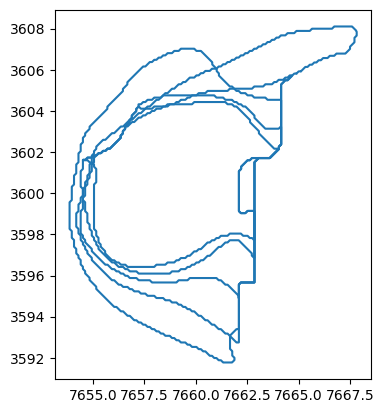

In [5]:
# Plotting the boundaries of the first five segmentations
segmentations.head().geometry.boundary.plot()

When we plot just their boundaries we see that they're right on top of each other.

Now, let us look at the first five polygons that are on Z-plane = 3

In [6]:
# Creating a new data frame with only cell boundaries on z = 3
z3 = segmentations.loc[segmentations['ZIndex'] == 3]

<Axes: >

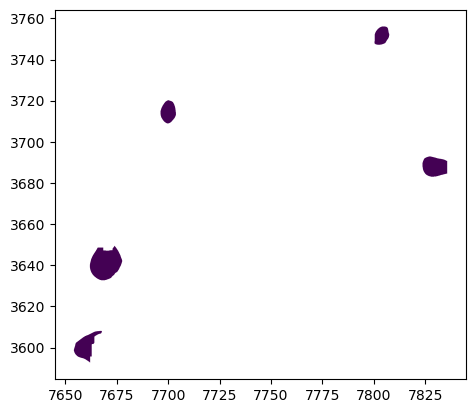

In [7]:
# Plotting the first five cells
z3.head().plot(column = 'ZIndex')

Here we see are looking at five different cells. A different plotting function was used to see the filled in cells.

It will take longer to run but we can look at all the cells that base through Z-plane = 3.

In [8]:
z3.to_parquet(f"{data_dir}z3_cell_boundaries.parquet")

<Axes: >

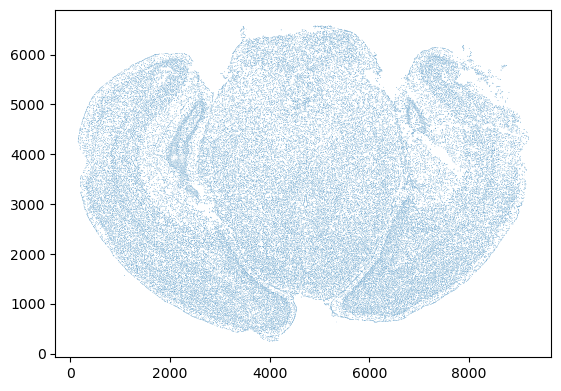

In [8]:
# Plotting all cells
z3.plot()